In [35]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CheckpointCallback
from gymnasium import spaces
import torch

## Load Traffic Environment

In [38]:
# Add the `src` folder to the Python path
sys.path.append(os.path.join(os.path.abspath('..'), 'src'))
import environment_gym as env_gym

## Create Evaluation and Test Function

In [41]:
def evaluate_model(log_path):
    """
    Reads the mean reward from the evaluation log and plots it to monitor convergence.

    Args:
    - log_path (str): Path to the directory containing the log file.
    """
    # Find the monitor CSV file generated by EvalCallback
    monitor_file = os.path.join(log_path, 'evaluations.npz')

    if not os.path.isfile(monitor_file):
        print("Error: Log file not found.")
        return

    # Load evaluation results
    results = np.load(monitor_file)
    mean_rewards = results['results'].mean(axis=1)  # Mean reward per evaluation

    # Plot the mean reward to observe convergence
    plt.plot(mean_rewards)
    plt.xlabel('Evaluation Step (x1000 timesteps)')
    plt.ylabel('Mean Reward')
    plt.title('Model Convergence')
    plt.show()

In [56]:
def test_model(model_path, env, num_episodes):
    """
    Evaluates the model over a specified number of episodes, records rewards for each episode,
    and plots the rewards.

    Args:
    - model_path (str): Path to the saved model.
    - env (gym.Env): The environment to evaluate the model on.
    - num_episodes (int): Total number of episodes to run the evaluation.

    Returns:
    - episode_rewards (list): List of total rewards for each episode.
    """
    # Load the model
    model = PPO.load(model_path)

    # Initialize a list to store rewards for each episode
    episode_rewards = []

    # Run the model for the specified number of episodes
    for episode in range(num_episodes):
        obs, info = env.reset()
        episode_reward = 0  

        while True:  # Run until the episode ends
            action, _states = model.predict(obs, deterministic=True)
            action = action.item()
            obs, reward, terminated, truncated, info = env.step(action)
            episode_reward += reward  # Accumulate reward

            # Check if the episode is done
            if terminated or truncated:
                episode_reward = round(episode_reward)
                episode_rewards.append(episode_reward)  # Record total reward for the episode
                break  # Exit the loop to start a new episode

    # Calculate average reward
    reward_ave = round(sum(episode_rewards) / num_episodes)
    print(f"Average reward of {num_episodes} episodes is {reward_ave}.")
    
    # Plot the episode rewards
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Rewards per Episode')
    plt.show()

    return episode_rewards

## Baseline PPO Agent

In [64]:
# Initialize and vectorize the environment for parallel processing
env = env_gym.TrafficEnvironment()
check_env(env, warn=True)
env.reset()

eval_env = Monitor(env_gym.TrafficEnvironment())
check_env(eval_env, warn=True)
eval_env.reset()

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO("MlpPolicy", env, verbose=1, device="cpu")

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path='./logs/ppo_baseline_model',
    log_path='./logs/baseline_results',
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 50000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Eval num_timesteps=1000, episode_reward=-11512.64 +/- 13593.18
Episode length: 1045.40 +/- 906.03
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.05e+03  |
|    mean_reward     | -1.15e+04 |
| time/              |           |
|    total_timesteps | 1000      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-22652.50 +/- 19149.60
Episode length: 1790.40 +/- 1275.71
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.79e+03  |
|    mean_reward     | -2.27e+04 |
| time/              |           |
|    total_timesteps | 2000      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 390       |
|    ep_rew_mean     | -1.21e+03 |
| time/              |           |
|    fps             |

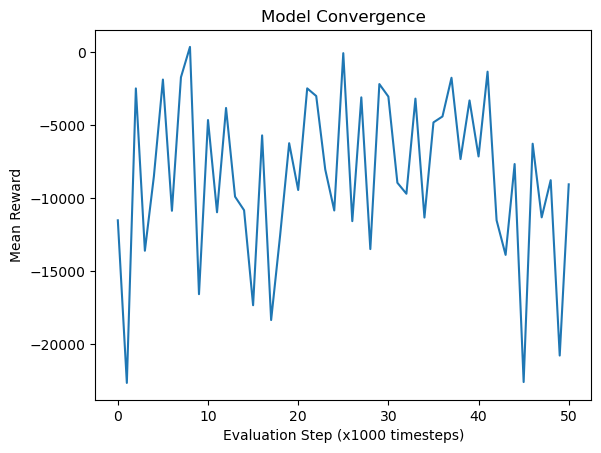

In [68]:
evaluate_model(log_path='./logs/baseline_results')

Average reward of 100 episodes is -7009.


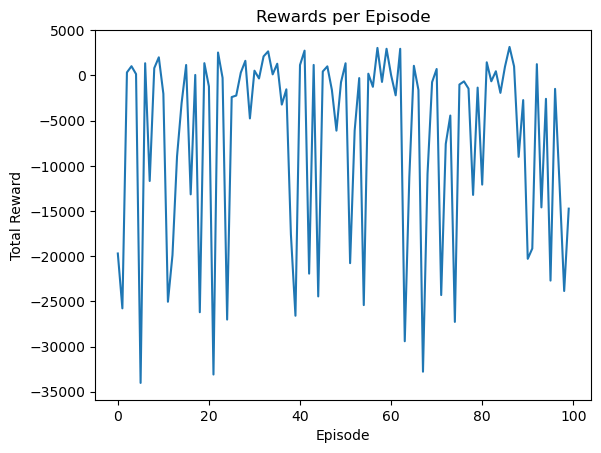

[-19700,
 -25769,
 333,
 1019,
 153,
 -34020,
 1347,
 -11680,
 810,
 2004,
 -2034,
 -25040,
 -19868,
 -8959,
 -3069,
 1155,
 -13159,
 53,
 -26200,
 1355,
 -1218,
 -33090,
 2533,
 -272,
 -27010,
 -2396,
 -2225,
 310,
 1617,
 -4757,
 523,
 -336,
 2104,
 2662,
 116,
 1294,
 -3228,
 -1540,
 -17577,
 -26588,
 1151,
 2738,
 -21930,
 1160,
 -24450,
 435,
 1004,
 -1609,
 -6109,
 -758,
 1342,
 -20770,
 -6099,
 -294,
 -25410,
 193,
 -1260,
 3042,
 -718,
 2947,
 34,
 -2200,
 2945,
 -29410,
 -11278,
 1063,
 -1606,
 -32779,
 -10870,
 -742,
 713,
 -24299,
 -7579,
 -4439,
 -27269,
 -1009,
 -658,
 -1459,
 -13220,
 -1349,
 -12080,
 1451,
 -648,
 461,
 -1932,
 961,
 3153,
 997,
 -9009,
 -2729,
 -20290,
 -19149,
 1245,
 -14600,
 -2590,
 -22699,
 -1488,
 -12240,
 -23850,
 -14739]

In [72]:
# Model testing
model_path = './logs/ppo_baseline_model/best_model.zip'
env_test = env_gym.TrafficEnvironment()
num_episodes = 100
test_model(model_path=model_path, env=env, num_episodes=num_episodes)

## Finetune PPO Agent

In [78]:
# Initialize and vectorize the environment
env = env_gym.TrafficEnvironment()
eval_env = Monitor(env_gym.TrafficEnvironment())

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path='./logs/ppo_finetune_model',
    log_path='./logs/finetune_results',
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Define the PPO model with MlpPolicy
model = PPO(
    "MlpPolicy", 
    env, 
    verbose=1,
    device = "cpu",
    learning_rate=2.5e-4,         
    n_steps=4096,               
    batch_size=128,              
    gae_lambda=0.95,            
    gamma=0.99,                 
    clip_range=0.1,
    clip_range_vf=0.1,
    n_epochs=20,
    ent_coef=0.005,
    target_kl=0.01
)

# Train the PPO model
total_timesteps = 50000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Eval num_timesteps=1000, episode_reward=-6885.82 +/- 11621.04
Episode length: 739.60 +/- 776.10
----------------------------------
| eval/              |           |
|    mean_ep_length  | 740       |
|    mean_reward     | -6.89e+03 |
| time/              |           |
|    total_timesteps | 1000      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-16014.68 +/- 18902.38
Episode length: 1352.20 +/- 1256.66
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.35e+03 |
|    mean_reward     | -1.6e+04 |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
Eval num_timesteps=3000, episode_reward=-22288.90 +/- 13770.61
Episode length: 1765.40 +/- 917.24
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.77e+03  |
|  

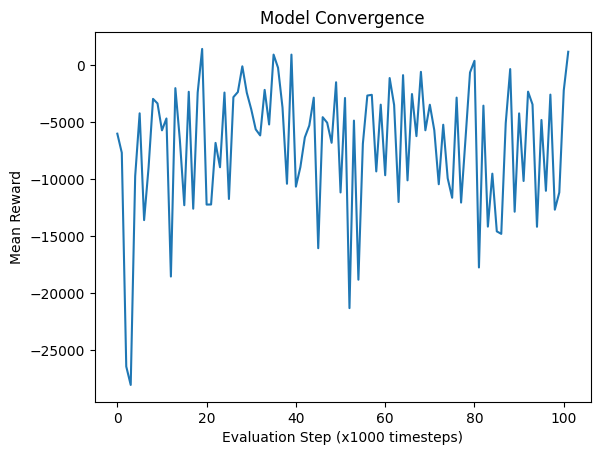

In [62]:
evaluate_model(log_path='./logs/finetune_results')

Average reward of 200 episodes is -6579.


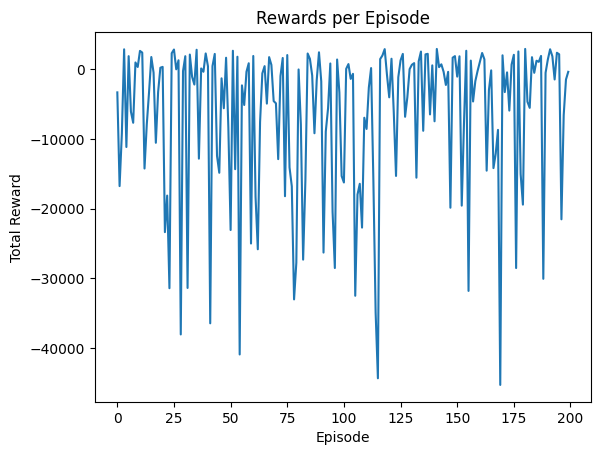

[-3329,
 -16764,
 -9239,
 2843,
 -11160,
 1862,
 -6084,
 -7685,
 960,
 311,
 2617,
 2376,
 -14245,
 -7924,
 -3289,
 1740,
 -509,
 -10555,
 -3290,
 206,
 323,
 -23365,
 -18124,
 -31402,
 2282,
 2815,
 -25,
 1271,
 -38029,
 -279,
 1858,
 -31365,
 2091,
 -1094,
 -2209,
 2780,
 -12830,
 102,
 -375,
 2249,
 413,
 -36434,
 434,
 2183,
 -12433,
 -14855,
 -1315,
 -5605,
 1637,
 -8344,
 -23060,
 2637,
 -14340,
 1779,
 -40900,
 -2324,
 -5135,
 -366,
 843,
 -24995,
 1888,
 -18265,
 -25820,
 -7560,
 -604,
 435,
 -4940,
 1722,
 601,
 -4579,
 -4895,
 -12899,
 -990,
 1602,
 -18214,
 2020,
 -14089,
 -16789,
 -33005,
 -27750,
 -44,
 -7910,
 -27305,
 -15950,
 2244,
 1472,
 -904,
 -9188,
 -1560,
 2416,
 -1750,
 -26293,
 -8939,
 -5624,
 815,
 -20439,
 -28508,
 1383,
 -3348,
 -15318,
 -16249,
 42,
 728,
 -1397,
 -668,
 -32485,
 -17970,
 -16435,
 -22714,
 -6965,
 -8570,
 -2634,
 156,
 -15883,
 -34889,
 -44314,
 1444,
 1961,
 2873,
 -805,
 -4038,
 1493,
 -6147,
 -15309,
 -1154,
 1257,
 2188,
 -6828,
 -4020,


In [64]:
# Model testing
model_path = './logs/ppo_finetune_model/best_model.zip'
env_test = env_gym.TrafficEnvironment()
num_episodes = 200
test_model(model_path=model_path, env=env, num_episodes=num_episodes)